# Prediction of Values generated by an exported commodity for a given year, country of import and quantity of that item.

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import yeojohnson
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Importing export datas of the years, 2021, 2022, 2023 and 2024 and concatenating them.

In [2]:
df_2021 = pd.read_csv('/Users/shivenshukla/Desktop/Data Science/PDS_PROJECT/Japan Export Data 2021 to 2024/merged_export_data 2021.csv', encoding="ISO-8859-1")
df_2021.columns = ['Year', 'HS Code', 'Country', 'Units', 'Quantity', 'Value']
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133523 entries, 0 to 133522
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Year      133523 non-null  int64 
 1   HS Code   133523 non-null  object
 2   Country   133523 non-null  int64 
 3   Units     133523 non-null  object
 4   Quantity  133523 non-null  int64 
 5   Value     133523 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.1+ MB


In [3]:
df_2021.drop_duplicates(inplace=True)
df_2021

,Year,HS Code,Country,Units,Quantity,Value
0,2021,'010121000',213,NO,4,25294
1,2021,'010121000',234,NO,1,6549
2,2021,'010121000',601,NO,7,1168071
3,2021,'010129000',108,NO,2,30500
4,2021,'010129000',210,NO,2,10477
...,...,...,...,...,...,...
133518,2021,'000000190',624,KG,883,5279
133519,2021,'000000190',625,KG,6424,43663
133520,2021,'000000190',626,KG,919311,82574
133521,2021,'000000190',627,KG,67644,62971


In [4]:
df_2022 = pd.read_csv('/Users/shivenshukla/Desktop/Data Science/PDS_PROJECT/Japan Export Data 2021 to 2024/merged_export_data 2022.csv', encoding="ISO-8859-1")
df_2022.columns = ['Year', 'HS Code', 'Country', 'Units', 'Quantity', 'Value']
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137094 entries, 0 to 137093
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Year      137094 non-null  int64 
 1   HS Code   137094 non-null  object
 2   Country   137094 non-null  int64 
 3   Units     137094 non-null  object
 4   Quantity  137094 non-null  int64 
 5   Value     137094 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.3+ MB


In [5]:
df_2022.drop_duplicates(inplace=True)
df_2022

,Year,HS Code,Country,Units,Quantity,Value
0,2022,'010121000',103,NO,1,11015
1,2022,'010121000',205,NO,13,119440
2,2022,'010121000',213,NO,6,39882
3,2022,'010121000',304,NO,1,8500
4,2022,'010121000',601,NO,5,1327216
...,...,...,...,...,...,...
137089,2022,'000000190',624,KG,99,263
137090,2022,'000000190',625,KG,13870,68395
137091,2022,'000000190',626,KG,683827,103321
137092,2022,'000000190',627,KG,32320,78245


In [6]:
df_2023 = pd.read_csv('/Users/shivenshukla/Desktop/Data Science/PDS_PROJECT/Japan Export Data 2021 to 2024/merged_export_data 2023.csv', encoding="ISO-8859-1")
df_2023.columns = ['Year', 'HS Code', 'Country', 'Units', 'Quantity', 'Value']
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138534 entries, 0 to 138533
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Year      138534 non-null  int64 
 1   HS Code   138534 non-null  object
 2   Country   138534 non-null  int64 
 3   Units     138534 non-null  object
 4   Quantity  138534 non-null  int64 
 5   Value     138534 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.3+ MB


In [7]:
df_2023.drop_duplicates(inplace=True)
df_2023

,Year,HS Code,Country,Units,Quantity,Value
0,2023,'010121000',234,NO,1,44957
1,2023,'010121000',304,NO,2,689945
2,2023,'010121000',601,NO,22,1414910
3,2023,'010129000',108,NO,2,18021
4,2023,'010129000',112,NO,2,8100
...,...,...,...,...,...,...
138529,2023,'000000190',624,KG,1270,1311
138530,2023,'000000190',625,KG,33027,119179
138531,2023,'000000190',626,KG,332063,135456
138532,2023,'000000190',627,KG,29084,69280


In [8]:
df_2024 = pd.read_csv('/Users/shivenshukla/Desktop/Data Science/PDS_PROJECT/Japan Export Data 2021 to 2024/merged_export_data 2024.csv', encoding="ISO-8859-1")
df_2024.columns = ['Year', 'HS Code', 'Country', 'Units', 'Quantity', 'Value']
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139728 entries, 0 to 139727
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Year      139728 non-null  int64 
 1   HS Code   139728 non-null  object
 2   Country   139728 non-null  int64 
 3   Units     139728 non-null  object
 4   Quantity  139728 non-null  int64 
 5   Value     139728 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.4+ MB


In [9]:
df_2024.drop_duplicates(inplace=True)
df_2024

,Year,HS Code,Country,Units,Quantity,Value
0,2024,'010121000',234,NO,2,21608
1,2024,'010121000',304,NO,3,46017
2,2024,'010121000',601,NO,6,2063895
3,2024,'010129000',103,NO,3,16280
4,2024,'010129000',108,NO,2,30000
...,...,...,...,...,...,...
139723,2024,'000000190',624,KG,1090,233
139724,2024,'000000190',625,KG,175504,359407
139725,2024,'000000190',626,KG,262179,141686
139726,2024,'000000190',627,KG,33094,85014


In [10]:
df_all_exports = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df_all_exports

,Year,HS Code,Country,Units,Quantity,Value
0,2021,'010121000',213,NO,4,25294
1,2021,'010121000',234,NO,1,6549
2,2021,'010121000',601,NO,7,1168071
3,2021,'010129000',108,NO,2,30500
4,2021,'010129000',210,NO,2,10477
...,...,...,...,...,...,...
548874,2024,'000000190',624,KG,1090,233
548875,2024,'000000190',625,KG,175504,359407
548876,2024,'000000190',626,KG,262179,141686
548877,2024,'000000190',627,KG,33094,85014


Strip off the last three characters of the 'HS Code' as it is the domestic code used by the Japanese Government to identify the local products

In [11]:
def split_hs_code(df, hs_column='HS Code'):
      
    # Ensure the HS Code column is treated as a string
    df[hs_column] = df[hs_column].astype(str)
    
    # Create 'Domestic code' column from the last 3 digits of HS Code
    df['Domestic code'] = df[hs_column].str[6:9]
    
    # Remove the last 3 digits from the HS Code column
    df[hs_column] = df[hs_column].str[1:7]
    
    return df

df_all_exports = split_hs_code(df_all_exports, hs_column='HS Code')
df_all_exports

,Year,HS Code,Country,Units,Quantity,Value,Domestic code
0,2021,010121,213,NO,4,25294,100
1,2021,010121,234,NO,1,6549,100
2,2021,010121,601,NO,7,1168071,100
3,2021,010129,108,NO,2,30500,900
4,2021,010129,210,NO,2,10477,900
...,...,...,...,...,...,...,...
548874,2024,000000,624,KG,1090,233,019
548875,2024,000000,625,KG,175504,359407,019
548876,2024,000000,626,KG,262179,141686,019
548877,2024,000000,627,KG,33094,85014,019


Read the HS Code list csv

In [12]:
df_hscode = pd.read_csv('/Users/shivenshukla/Desktop/Data Science/PDS_PROJECT/Japan Export Data 2021 to 2024/HS_Code_List.csv', encoding='iso-8859-1')

In [13]:
df_hscode.columns = ['PC Code', 'Units', 'Overview of items', 'HS Code']

Strip of the unclean, unwanted characters from each row of the 'Overview of items' column

In [14]:
df_hscode['Overview of items'] = df_hscode['Overview of items'].str.replace('?', '', regex=False)
df_hscode['Overview of items'] = df_hscode['Overview of items'].str.replace('\n', ' ', regex=False)

In [15]:
df_hscode['Overview of items']

0                         FOOD AND LIVE ANIMALS
1                                  LIVE ANIMALS
2                                 Chicken FOWLS
3                                       HORSES 
4                    Meat and meat preparations
                         ...                   
427     Works of art, antiques and collectibles
428               Carving and molding materials
429                  COMMODITIES NOT CLASSIFIED
430                             RE-IMPORT GOODS
431                                       GOLD 
Name: Overview of items, Length: 432, dtype: object

Some more modifications in the 'HS Code' as "-", "~" and "to" indicate range. Also, if the HS Code has missing characters, they should be replaced with 0's.

In [16]:
def process_code(code_str):
    """
    Process a single code string.
    If the cleaned code has exactly 4 digits, expand by appending every possible 2-digit combination (00 to 99).
    Otherwise, return a single standardized code (left-padded with zeros to 9 digits).
    """
    # Remove non-digit characters
    code_digits = re.sub(r'\D', '', code_str)
    
    # If exactly 4 digits, expand by appending every possible 2-digit combination
    if len(code_digits) == 4:
        return [code_digits + f"{i:02d}" for i in range(100)]
    else:
        # Standardize: left-pad with zeros to 9 digits (or take first 9 if longer)
        standardized = code_digits.zfill(6)[:6]
        return [standardized]

def clean_cell(cell):
    """
    Process a single cell from the HS Code column.
    
    Steps:
    - Remove decimal points.
    - Replace " to " with "~" so that both notations are treated the same.
    - For parts separated by commas, question marks, or newlines:
         * If a part contains a hyphen (and no "~"), ignore everything after the hyphen 
           and add an extra code: one more than the code before the hyphen.
         * If a part contains "~", treat it as a range.
         * Otherwise, process it as a single code.
    Returns a flat list of processed codes.
    """
    if pd.isna(cell):
        return []
    
    # Remove decimal points and normalize range operator
    cell = cell.replace(".", "").replace(" to ", "~")
    
    # Split on commas, question marks, and newlines (do not split on hyphen)
    parts = re.split(r'[,?\n]+', cell)
    
    all_codes = []
    
    for part in parts:
        part = part.strip()
        if not part:
            continue
        
        # If hyphen is present (and no "~"), ignore everything after hyphen 
        # and add an extra code: one more than the main code.
        if "-" in part and "~" not in part:
            main_part = part.split("-")[0].strip()
            codes = process_code(main_part)
            # Compute one extra code (one more than the main code)
            main_digits = re.sub(r'\D', '', main_part)
            if main_digits.isdigit():
                try:
                    next_code = str(int(main_digits) + 1)
                    extra_codes = process_code(next_code)
                    codes.extend(extra_codes)
                except ValueError:
                    pass
            all_codes.extend(codes)
        elif "~" in part:
            # Process as a range
            range_parts = part.split("~")
            if len(range_parts) != 2 or not range_parts[0].strip() or not range_parts[1].strip():
                continue  # Skip invalid range entries
            start_str = range_parts[0].strip()
            end_str = range_parts[1].strip()
            
            # Remove non-digits from start and end
            start_digits = re.sub(r'\D', '', start_str)
            end_digits = re.sub(r'\D', '', end_str)
            
            if start_digits.isdigit() and end_digits.isdigit():
                try:
                    start_int = int(start_digits)
                    end_int = int(end_digits)
                except ValueError:
                    continue
                
                # Generate codes for every integer in the range (inclusive)
                for num in range(start_int, end_int + 1):
                    code_candidate = str(num)
                    all_codes.extend(process_code(code_candidate))
        else:
            # Process as a single code normally
            all_codes.extend(process_code(part))
    
    return all_codes

def expand_hs_codes_to_rows(df, hs_column='HS Code'):
    """
    Processes the HS Code column of the DataFrame.
    For each row, this function applies the cleaning rules to generate a list of HS codes,
    then explodes the list so that each code gets its own row.
    """
    # Apply clean_cell to each row to get a list of codes.
    df['HS_codes_list'] = df[hs_column].astype(str).apply(clean_cell)
    
    # Explode the list into separate rows.
    df_exploded = df.explode('HS_codes_list')
    
    # Optionally, rename the exploded column to something simpler.
    df_exploded = df_exploded.rename(columns={'HS_codes_list': 'HS Code Expanded'})
    
    return df_exploded

df_exploded = expand_hs_codes_to_rows(df_hscode, hs_column='HS Code')
print(df_exploded)


     PC Code Units      Overview of items  \
0          0   NaN  FOOD AND LIVE ANIMALS   
0          0   NaN  FOOD AND LIVE ANIMALS   
0          0   NaN  FOOD AND LIVE ANIMALS   
0          0   NaN  FOOD AND LIVE ANIMALS   
0          0   NaN  FOOD AND LIVE ANIMALS   
..       ...   ...                    ...   
431      903    KG                  GOLD    
431      903    KG                  GOLD    
431      903    KG                  GOLD    
431      903    KG                  GOLD    
431      903    KG                  GOLD    

                                               HS Code HS Code Expanded  
0    01, 0201~0208, 0210, 03~04, 07~10, 1101~1107, ...           000001  
0    01, 0201~0208, 0210, 03~04, 07~10, 1101~1107, ...           000201  
0    01, 0201~0208, 0210, 03~04, 07~10, 1101~1107, ...           000202  
0    01, 0201~0208, 0210, 03~04, 07~10, 1101~1107, ...           000203  
0    01, 0201~0208, 0210, 03~04, 07~10, 1101~1107, ...           000204  
..             

Drop the old column of HS Code

In [17]:
df_exploded.drop('HS Code', axis=1, inplace=True)
df_exploded = df_exploded.rename(columns={"HS Code Expanded": "HS Code"})
df_exploded

,PC Code,Units,Overview of items,HS Code
0,0,NaN,FOOD AND LIVE ANIMALS,000001
0,0,NaN,FOOD AND LIVE ANIMALS,000201
0,0,NaN,FOOD AND LIVE ANIMALS,000202
0,0,NaN,FOOD AND LIVE ANIMALS,000203
0,0,NaN,FOOD AND LIVE ANIMALS,000204
...,...,...,...,...
431,903,KG,GOLD,710995
431,903,KG,GOLD,710996
431,903,KG,GOLD,710997
431,903,KG,GOLD,710998


Final Merge

In [18]:
unique_overviews = df_exploded[['HS Code', 'Overview of items']].drop_duplicates(subset='HS Code')

final_df = pd.merge(df_all_exports, unique_overviews, on='HS Code', how='left')

In [19]:
final_df

,Year,HS Code,Country,Units,Quantity,Value,Domestic code,Overview of items
0,2021,010121,213,NO,4,25294,100,HORSES
1,2021,010121,234,NO,1,6549,100,HORSES
2,2021,010121,601,NO,7,1168071,100,HORSES
3,2021,010129,108,NO,2,30500,900,HORSES
4,2021,010129,210,NO,2,10477,900,HORSES
...,...,...,...,...,...,...,...,...
548874,2024,000000,624,KG,1090,233,019,(Tuna) ALBACORE AND TUNA
548875,2024,000000,625,KG,175504,359407,019,(Tuna) ALBACORE AND TUNA
548876,2024,000000,626,KG,262179,141686,019,(Tuna) ALBACORE AND TUNA
548877,2024,000000,627,KG,33094,85014,019,(Tuna) ALBACORE AND TUNA


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548879 entries, 0 to 548878
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               548879 non-null  int64 
 1   HS Code            548879 non-null  object
 2   Country            548879 non-null  int64 
 3   Units              548879 non-null  object
 4   Quantity           548879 non-null  int64 
 5   Value              548879 non-null  int64 
 6   Domestic code      548879 non-null  object
 7   Overview of items  492461 non-null  object
dtypes: int64(4), object(4)
memory usage: 33.5+ MB


# Missing values Handling

In [21]:
null_counts = final_df.isnull().sum()
print(null_counts)

Year                     0
HS Code                  0
Country                  0
Units                    0
Quantity                 0
Value                    0
Domestic code            0
Overview of items    56418
dtype: int64


In [22]:
final_df = final_df.dropna(subset=['Overview of items'])
final_df

,Year,HS Code,Country,Units,Quantity,Value,Domestic code,Overview of items
0,2021,010121,213,NO,4,25294,100,HORSES
1,2021,010121,234,NO,1,6549,100,HORSES
2,2021,010121,601,NO,7,1168071,100,HORSES
3,2021,010129,108,NO,2,30500,900,HORSES
4,2021,010129,210,NO,2,10477,900,HORSES
...,...,...,...,...,...,...,...,...
548874,2024,000000,624,KG,1090,233,019,(Tuna) ALBACORE AND TUNA
548875,2024,000000,625,KG,175504,359407,019,(Tuna) ALBACORE AND TUNA
548876,2024,000000,626,KG,262179,141686,019,(Tuna) ALBACORE AND TUNA
548877,2024,000000,627,KG,33094,85014,019,(Tuna) ALBACORE AND TUNA


In [23]:
null_counts = final_df.isnull().sum()
print(null_counts)

Year                 0
HS Code              0
Country              0
Units                0
Quantity             0
Value                0
Domestic code        0
Overview of items    0
dtype: int64


In [24]:
# Drop rows where 'Quantity' is zero
final_df = final_df[final_df['Quantity'] != 0]

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488524 entries, 0 to 548878
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               488524 non-null  int64 
 1   HS Code            488524 non-null  object
 2   Country            488524 non-null  int64 
 3   Units              488524 non-null  object
 4   Quantity           488524 non-null  int64 
 5   Value              488524 non-null  int64 
 6   Domestic code      488524 non-null  object
 7   Overview of items  488524 non-null  object
dtypes: int64(4), object(4)
memory usage: 33.5+ MB


In [26]:
final_df.describe()

,Year,Country,Quantity,Value
count,488524.000000,488524.000000,4.885240e+05,4.885240e+05
mean,2022.516462,237.924884,2.030369e+06,7.656048e+05
std,1.115370,149.527359,8.280080e+07,1.200212e+07
min,2021.000000,103.000000,1.000000e+00,2.010000e+02
25%,2022.000000,117.000000,1.200000e+02,1.512000e+03
50%,2023.000000,207.000000,1.614000e+03,1.032500e+04
75%,2024.000000,304.000000,2.747025e+04,9.071525e+04
max,2024.000000,628.000000,2.559096e+10,1.769969e+09


# Data Visualisation for going furthur

<Axes: xlabel='Year'>

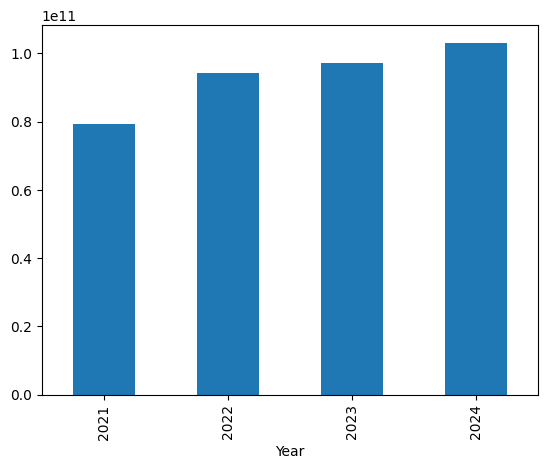

In [27]:
final_df.groupby('Year')['Value'].sum().plot(kind='bar')

In [28]:
# Top 10 countries by total export value
top_countries_value = final_df.groupby('Country')['Value'].sum().sort_values(ascending=False).head(10)

# Top 10 countries by total quantity
top_countries_quantity = final_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

In [29]:
top_countries_quantity

Country
105    263362559599
106     95911084195
103     89653778362
108     86679688033
111     84087561016
304     55561856725
113     49883202194
117     47424668141
110     34551921497
112     34118874831
Name: Quantity, dtype: int64

In [30]:
top_countries_value

Country
304    71910535071
105    69513656499
103    25308358772
106    24352892610
108    17354214120
111    15552500256
112    10282162514
213     9831059248
110     8859388192
601     8538902841
Name: Value, dtype: int64

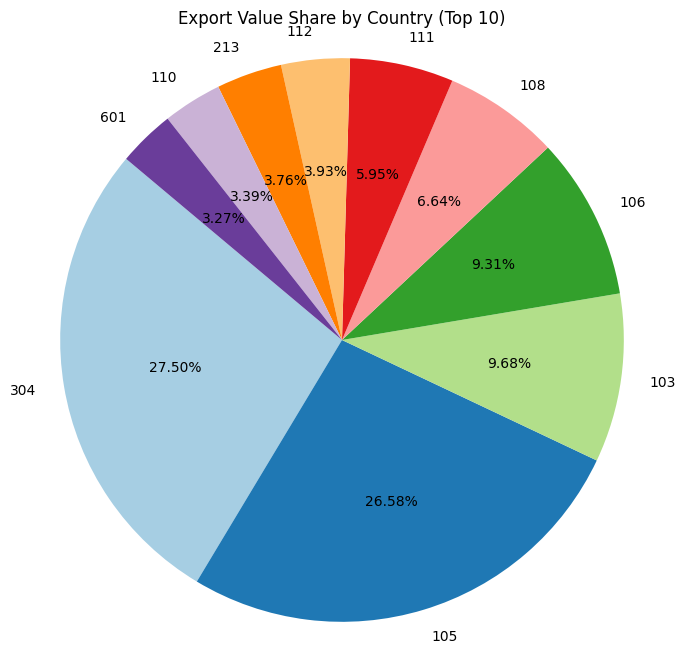

In [31]:
export_value_billions = top_countries_value / 1e9

plt.figure(figsize=(8, 8))
plt.pie(export_value_billions, labels=top_countries_value.index,
        autopct=lambda p: f'{p:.2f}%', startangle=140, colors=sns.color_palette('Paired'))
plt.title('Export Value Share by Country (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

/var/folders/r5/8w5csvqx4kb_dt4j_rllwv180000gn/T/ipykernel_14333/2017691695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_billions.values, y=value_billions.index, palette='viridis')


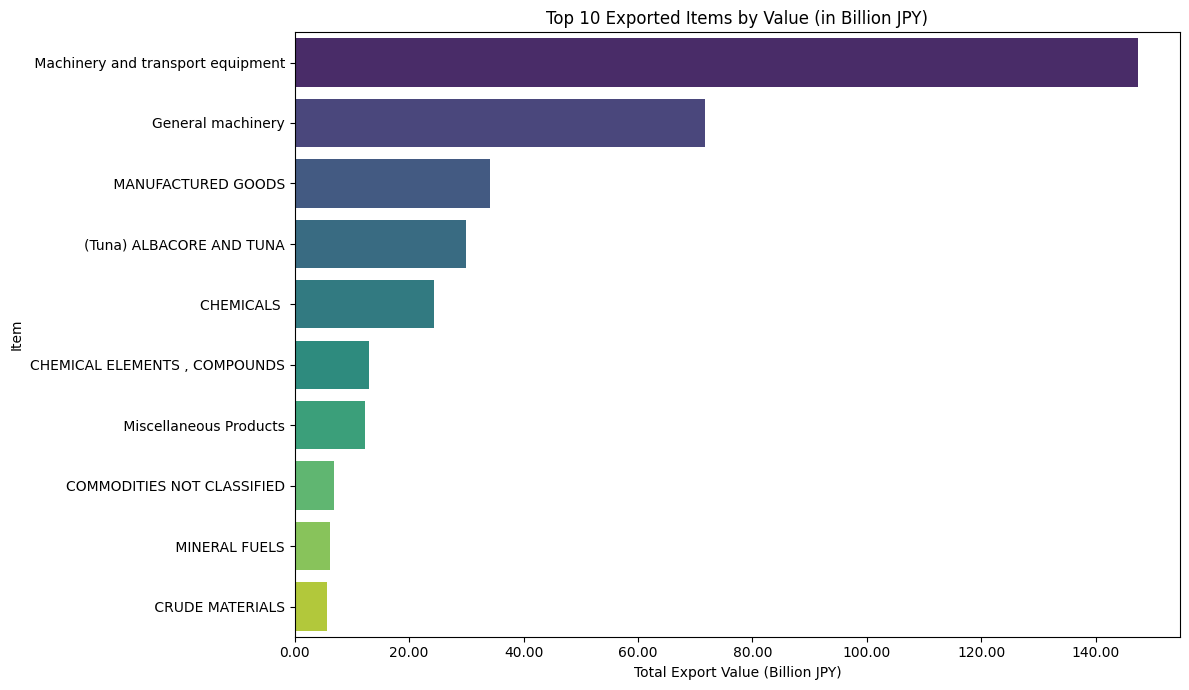

In [32]:
# Top 10 exported items by Value
top_items_value = final_df.groupby('Overview of items')['Value'].sum().sort_values(ascending=False).head(10)

# Top 10 exported items by Quantity
top_items_quantity = final_df.groupby('Overview of items')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
value_billions = top_items_value / 1e9
sns.barplot(x=value_billions.values, y=value_billions.index, palette='viridis')

# Format x-axis to 2 decimals
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.title('Top 10 Exported Items by Value (in Billion JPY)')
plt.xlabel('Total Export Value (Billion JPY)')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

/var/folders/r5/8w5csvqx4kb_dt4j_rllwv180000gn/T/ipykernel_14333/28469714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items_quantity.values, y=top_items_quantity.index, palette='crest')


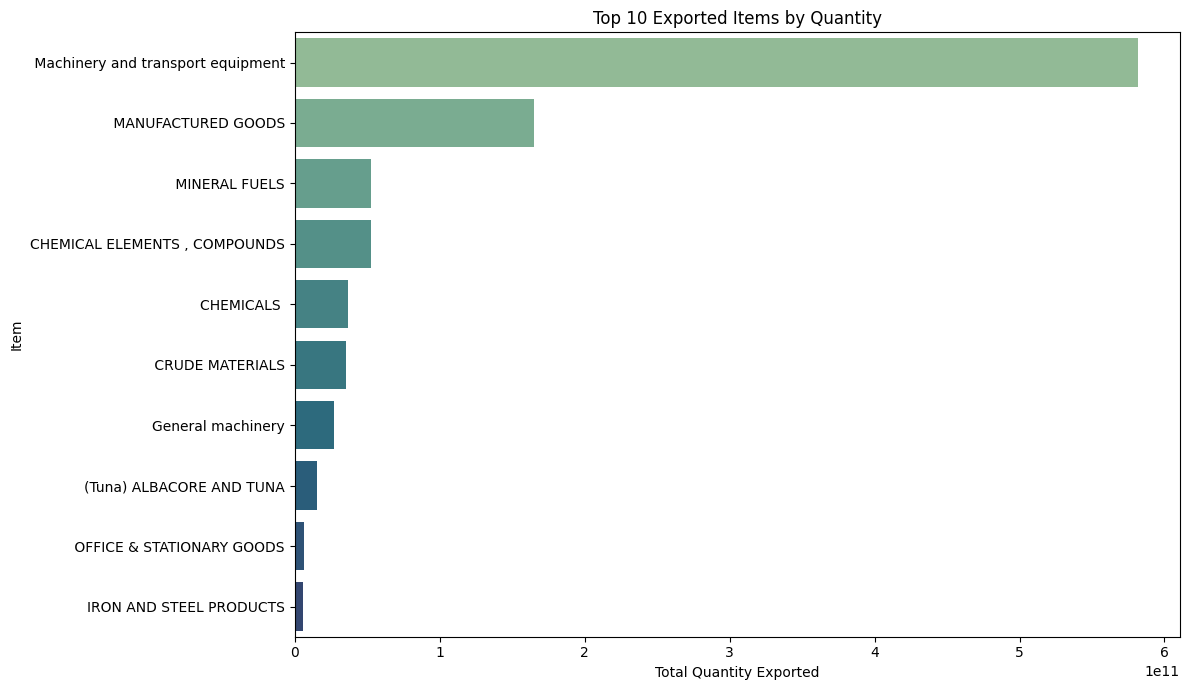

In [33]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_items_quantity.values, y=top_items_quantity.index, palette='crest')

plt.title('Top 10 Exported Items by Quantity')
plt.xlabel('Total Quantity Exported')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

Now since our dataset is extra-ordinarily large and all products have different sets of Quantity and Value, we should go for individual products for getting better accuracy of models.

General Machinery

In [34]:
machinery_df = final_df[final_df['Overview of items'] == 'General machinery']
machinery_df

,Year,HS Code,Country,Units,Quantity,Value,Domestic code,Overview of items
71756,2021,840110,106,KG,169,2125,000,General machinery
71757,2021,840130,205,KG,22923,1963181,000,General machinery
71758,2021,840130,304,KG,28800,5651426,000,General machinery
71759,2021,840140,103,KG,9385,332683,000,General machinery
71760,2021,840140,105,KG,567730,683775,000,General machinery
...,...,...,...,...,...,...,...,...
508680,2024,848790,615,KG,29,362,000,General machinery
508681,2024,848790,620,KG,168,2990,000,General machinery
508682,2024,848790,624,KG,83,2583,000,General machinery
508683,2024,848790,625,KG,9939,206150,000,General machinery


In [35]:
machinery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96477 entries, 71756 to 508684
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96477 non-null  int64 
 1   HS Code            96477 non-null  object
 2   Country            96477 non-null  int64 
 3   Units              96477 non-null  object
 4   Quantity           96477 non-null  int64 
 5   Value              96477 non-null  int64 
 6   Domestic code      96477 non-null  object
 7   Overview of items  96477 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.6+ MB


# Scaling of Dataset

Robust Scaling for is used for dataframe normalization as it is less sensitive to outliers and our data, being too large, likely contains outliers.

In [36]:
# (Make sure these are indeed numeric. If some are categorical-coded, confirm they're in numeric form).

# Select the numeric columns to scale
numeric_cols = machinery_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize robustScaler
robust_scalar = RobustScaler()

# Fit and transform only the numeric columns
scaled_array = robust_scalar.fit_transform(machinery_df[numeric_cols])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=machinery_df.index)

# (Optional) If you want to merge back with non-numeric columns:
non_numeric_df = machinery_df.drop(columns=numeric_cols)
final_scaled_df = pd.concat([scaled_df, non_numeric_df], axis=1)

print("Sample of robust scaled data:")
print(final_scaled_df.head())

Sample of robust scaled data:
       Year   Country   Quantity      Value HS Code Units Domestic code  \
71756  -1.0 -0.557789  -0.072346  -0.097048  840110    KG           000   
71757  -1.0 -0.060302   0.686602  17.152710  840130    KG           000   
71758  -1.0  0.437186   0.882626  49.595095  840130    KG           000   
71759  -1.0 -0.572864   0.235049   2.810592  840140    KG           000   
71760  -1.0 -0.562814  18.858344   5.898853  840140    KG           000   

       Overview of items  
71756  General machinery  
71757  General machinery  
71758  General machinery  
71759  General machinery  
71760  General machinery  


Apply log and Yeo Johnson transformation for standardization of the dataframe.

In [37]:
final_scaled_df['Value_log'] = np.log(final_scaled_df['Value'] + 1)

In [38]:
final_scaled_df['Value_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Value_log'])

In [39]:
final_scaled_df['Quantity_log'] = np.log(final_scaled_df['Quantity'] + 1)

In [40]:
final_scaled_df['Quantity_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Quantity_log'])

In [41]:
final_scaled_df['Year_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Year'])

In [42]:
final_scaled_df['Country_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Country'])

Distribution of data after transformation

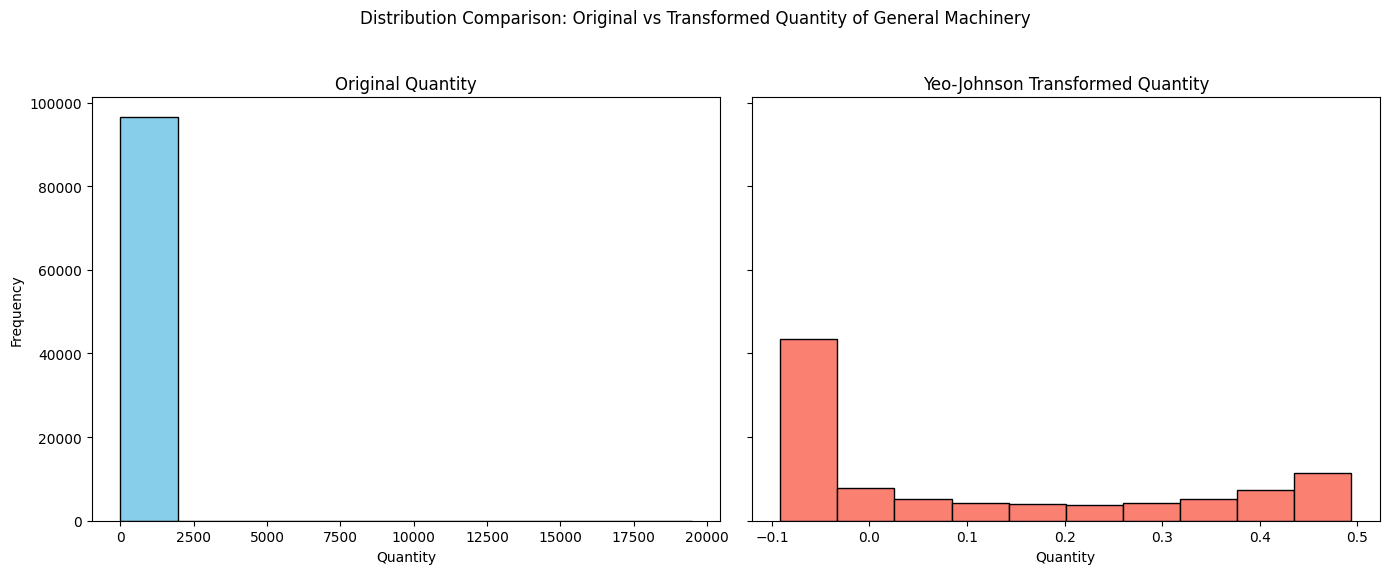

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Original Quantity
axs[0].hist(final_scaled_df['Quantity'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Original Quantity')
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Frequency')

# Right: Transformed Quantity (Yeo-Johnson)
axs[1].hist(final_scaled_df['Quantity_YJ'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Yeo-Johnson Transformed Quantity')
axs[1].set_xlabel('Quantity')

plt.suptitle('Distribution Comparison: Original vs Transformed Quantity of General Machinery')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

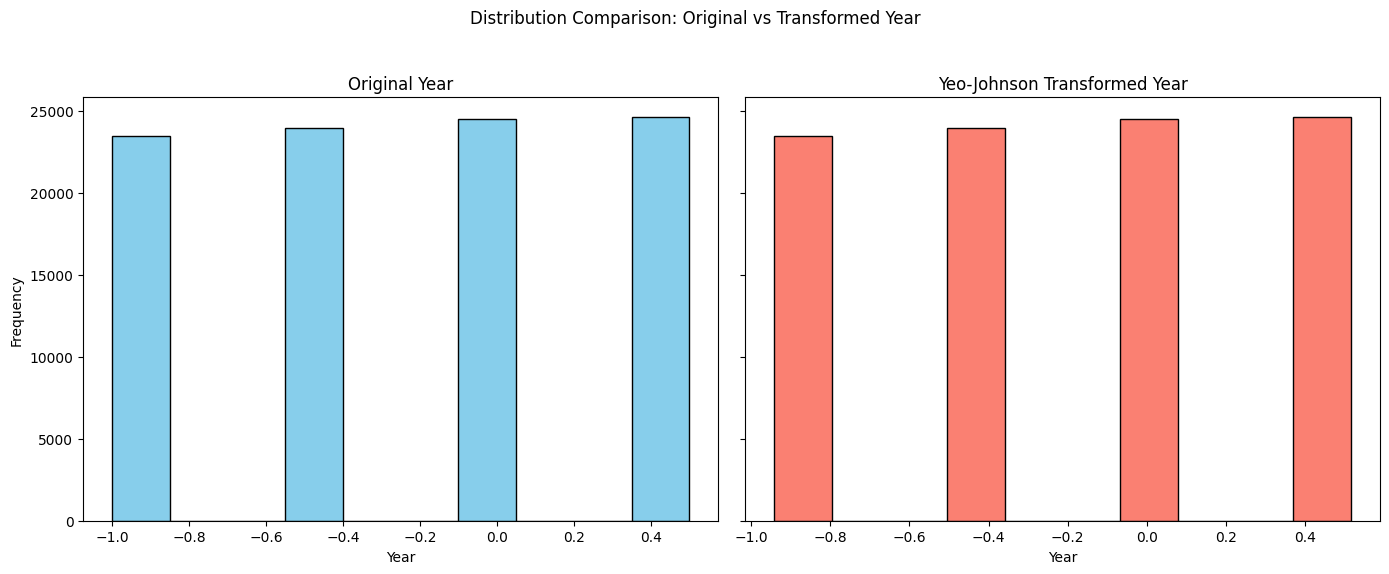

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Original Year
axs[0].hist(final_scaled_df['Year'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Original Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Frequency')

# Right: Transformed Year (Yeo-Johnson)
axs[1].hist(final_scaled_df['Year_YJ'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Yeo-Johnson Transformed Year')
axs[1].set_xlabel('Year')

plt.suptitle('Distribution Comparison: Original vs Transformed Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [45]:
final_scaled_df

,Year,Country,Quantity,Value,HS Code,Units,Domestic code,Overview of items,Value_log,Value_YJ,Quantity_log,Quantity_YJ,Year_YJ,Country_YJ
71756,-1.0,-0.557789,-0.072346,-0.097048,840110,KG,000,General machinery,-0.102086,-0.117882,-0.075096,-0.084012,-0.942866,-0.767235
71757,-1.0,-0.060302,0.686602,17.152710,840130,KG,000,General machinery,2.898820,0.497266,0.522716,0.283947,-0.942866,-0.062650
71758,-1.0,0.437186,0.882626,49.595095,840130,KG,000,General machinery,3.923855,0.512596,0.632667,0.311912,-0.942866,0.344619
71759,-1.0,-0.572864,0.235049,2.810592,840140,KG,000,General machinery,1.337785,0.428418,0.211111,0.159005,-0.942866,-0.794038
71760,-1.0,-0.562814,18.858344,5.898853,840140,KG,000,General machinery,1.931355,0.466901,2.988624,0.467050,-0.942866,-0.776132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508680,0.5,2.000000,-0.077015,-0.112556,848790,KG,000,General machinery,-0.119409,-0.141248,-0.080143,-0.090331,0.516969,0.943630
508681,0.5,2.025126,-0.072379,-0.089439,848790,KG,000,General machinery,-0.093695,-0.106933,-0.075132,-0.084057,0.516969,0.949727
508682,0.5,2.045226,-0.075214,-0.093019,848790,KG,000,General machinery,-0.097634,-0.112044,-0.078193,-0.087880,0.516969,0.954557
508683,0.5,2.050251,0.253527,1.697588,848790,KG,000,General machinery,0.992358,0.389705,0.225961,0.167201,0.516969,0.955758


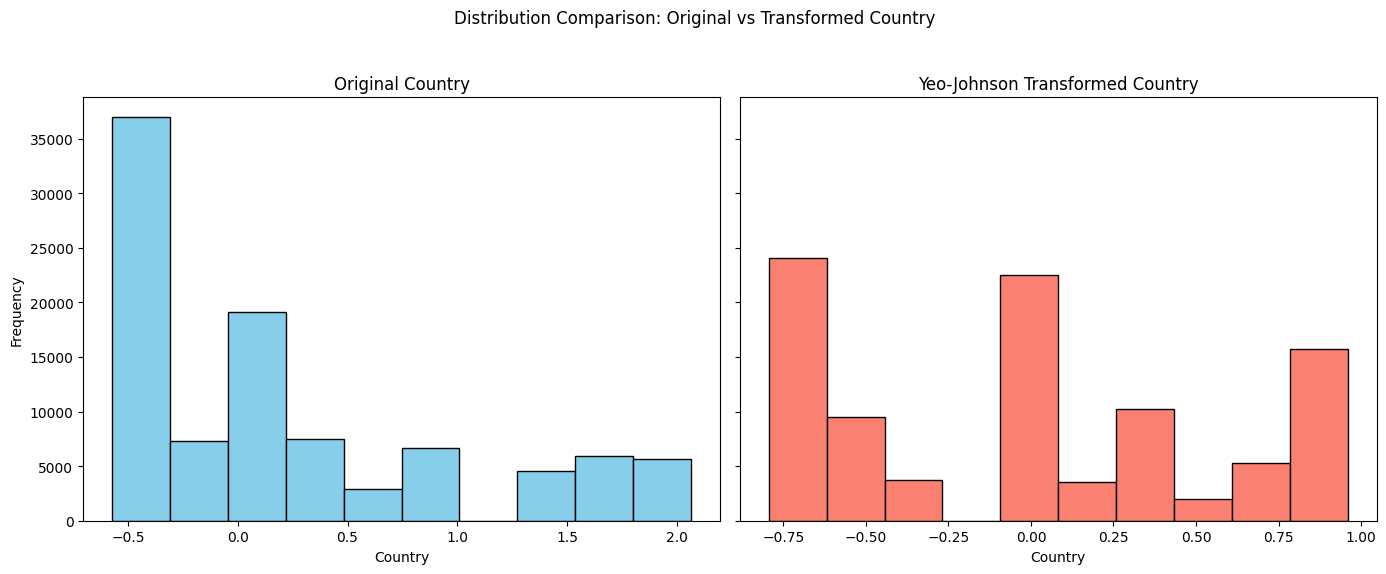

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Original Country
axs[0].hist(final_scaled_df['Country'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Original Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Frequency')

# Right: Transformed Country (Yeo-Johnson)
axs[1].hist(final_scaled_df['Country_YJ'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Yeo-Johnson Transformed Country')
axs[1].set_xlabel('Country')

plt.suptitle('Distribution Comparison: Original vs Transformed Country')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Outlier Handling

Boxplot for outlier detection

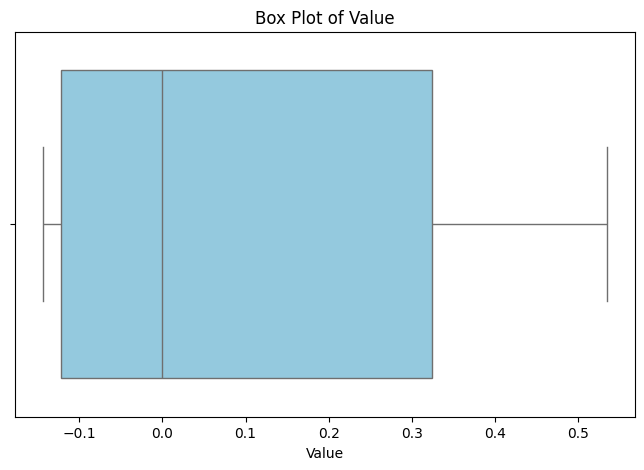

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Value_YJ'], color='skyblue')
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()

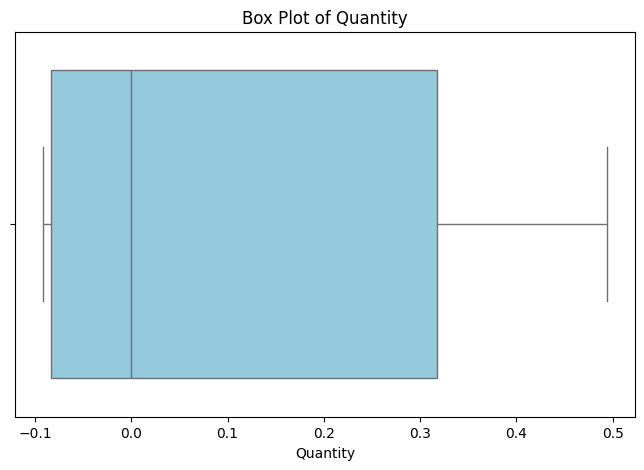

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Quantity_YJ'], color='skyblue')
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

Though we don't have any visible outlier, we'll do IQR for safety

In [49]:
Q1 = final_scaled_df['Quantity_YJ'].quantile(0.25)
Q3 = final_scaled_df['Quantity_YJ'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter out the outliers (or alternatively, cap them)
final_scaled_df = final_scaled_df[(final_scaled_df['Quantity_YJ'] >= lower_bound) & (final_scaled_df['Quantity_YJ'] <= upper_bound)]
print("Data after IQR filtering:\n", final_scaled_df)

Lower Bound: -0.6854159850316716
Upper Bound: 0.9188036670833519
Data after IQR filtering:
         Year   Country   Quantity      Value HS Code Units Domestic code  \
71756   -1.0 -0.557789  -0.072346  -0.097048  840110    KG           000   
71757   -1.0 -0.060302   0.686602  17.152710  840130    KG           000   
71758   -1.0  0.437186   0.882626  49.595095  840130    KG           000   
71759   -1.0 -0.572864   0.235049   2.810592  840140    KG           000   
71760   -1.0 -0.562814  18.858344   5.898853  840140    KG           000   
...      ...       ...        ...        ...     ...   ...           ...   
508680   0.5  2.000000  -0.077015  -0.112556  848790    KG           000   
508681   0.5  2.025126  -0.072379  -0.089439  848790    KG           000   
508682   0.5  2.045226  -0.075214  -0.093019  848790    KG           000   
508683   0.5  2.050251   0.253527   1.697588  848790    KG           000   
508684   0.5  2.055276  -0.076315  -0.107137  848790    KG           000

In [50]:
Q1 = final_scaled_df['Value_YJ'].quantile(0.25)
Q3 = final_scaled_df['Value_YJ'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter out the outliers (or alternatively, cap them)
final_scaled_df = final_scaled_df[(final_scaled_df['Value_YJ'] >= lower_bound) & (final_scaled_df['Value_YJ'] <= upper_bound)]
print("Data after IQR filtering:\n", final_scaled_df)

Lower Bound: -0.7921630370242029
Upper Bound: 0.9947553261386983
Data after IQR filtering:
         Year   Country   Quantity      Value HS Code Units Domestic code  \
71756   -1.0 -0.557789  -0.072346  -0.097048  840110    KG           000   
71757   -1.0 -0.060302   0.686602  17.152710  840130    KG           000   
71758   -1.0  0.437186   0.882626  49.595095  840130    KG           000   
71759   -1.0 -0.572864   0.235049   2.810592  840140    KG           000   
71760   -1.0 -0.562814  18.858344   5.898853  840140    KG           000   
...      ...       ...        ...        ...     ...   ...           ...   
508680   0.5  2.000000  -0.077015  -0.112556  848790    KG           000   
508681   0.5  2.025126  -0.072379  -0.089439  848790    KG           000   
508682   0.5  2.045226  -0.075214  -0.093019  848790    KG           000   
508683   0.5  2.050251   0.253527   1.697588  848790    KG           000   
508684   0.5  2.055276  -0.076315  -0.107137  848790    KG           000

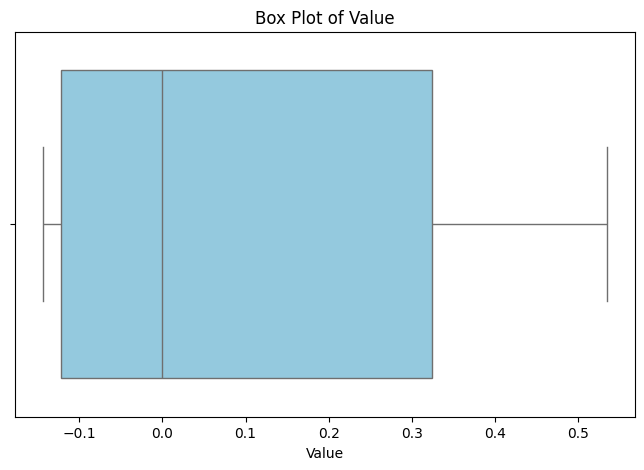

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Value_YJ'], color='skyblue')
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()

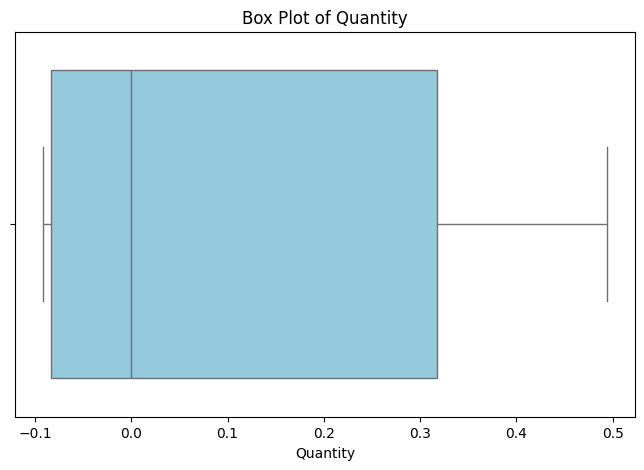

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Quantity_YJ'], color='skyblue')
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Machine Learning Models (Prediction)

Linear Regression

Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
Mean Squared Log Error (MSLE): 0.0110
Mean Absolute Percentage Error (MAPE): 1148716762921.86%
R-squared Score (R²): 0.75
Accuracy Percentage (based on R²): 74.96%
Accuracy of the model: 74.96%


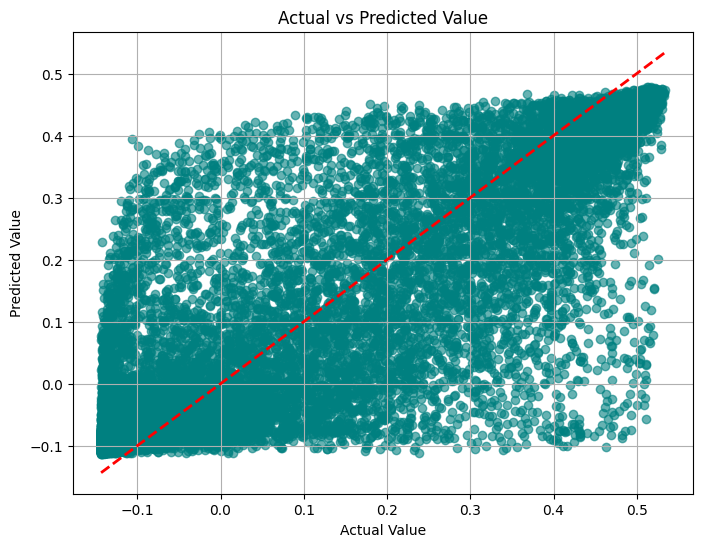

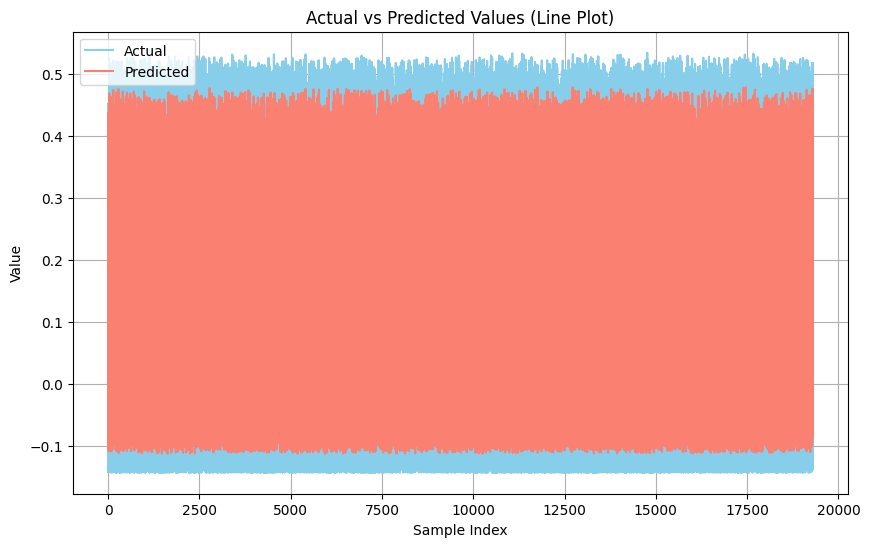

In [53]:
# Assuming final_scaled_df is your DataFrame and it's clean

# Step 1: Define features (X) and target (y)
X = final_scaled_df[['Quantity_YJ', 'Year_YJ', 'Country_YJ']]
y = final_scaled_df['Value_YJ']

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")

accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model: {accuracy:.2f}%")

# 1. Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value')
plt.grid(True)
plt.show()

# 2. Line plot (index-based comparison)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='skyblue')
plt.plot(y_pred, label='Predicted', color='salmon')
plt.title('Actual vs Predicted Values (Line Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Evaluation on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation on testing data (already done)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")

print("\nTesting Performance:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Simple interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("\n→ The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("\n→ The model may be UNDERFITTING.")
else:
    print("\n→ The model seems to be GENERALIZING well.")

Training Performance:
Train MSE: 0.01
Train R-squared: 0.75

Testing Performance:
Test MSE: 0.01
Test R-squared: 0.75

→ The model seems to be GENERALIZING well.


Random Forest Regression

RandomForest Regression Evaluation:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
Mean Squared Log Error (MSLE): 0.0105
Mean Absolute Percentage Error (MAPE): 2201801049538.62%
R-squared Score (R²): 0.76
Accuracy Percentage (based on R²): 76.14%


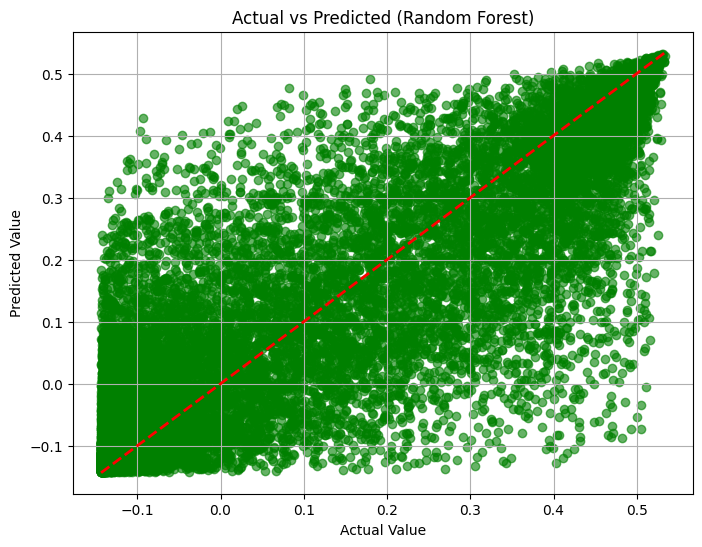

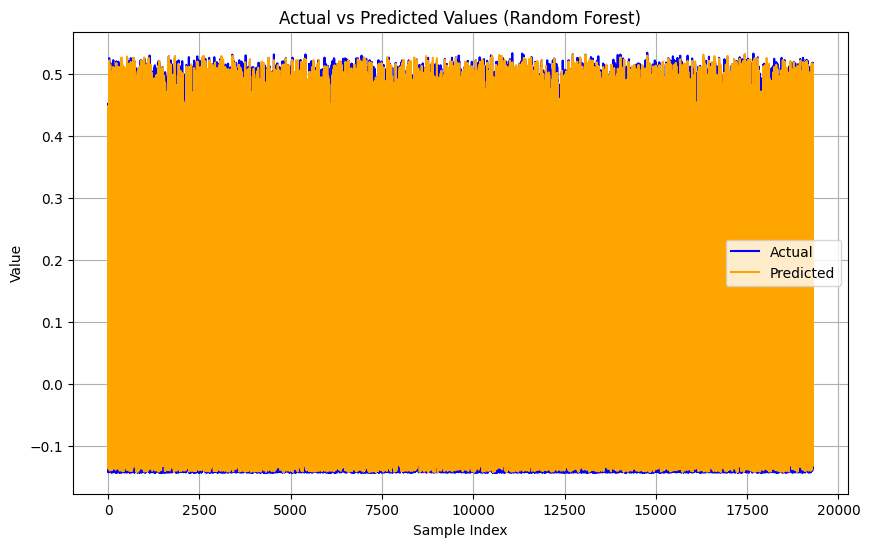

In [55]:
# Step 1: Define features and target
X = final_scaled_df[['Quantity_YJ', 'Year_YJ', 'Country_YJ']]
y = final_scaled_df['Value_YJ']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("RandomForest Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")

# Step 6: Plots

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted (Random Forest)')
plt.grid(True)
plt.show()

# Line plot: Sample-wise Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Evaluation on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation on testing data (already done)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")

print("\nTesting Performance:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Simple interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("\n→ The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("\n→ The model may be UNDERFITTING.")
else:
    print("\n→ The model seems to be GENERALIZING well.")

Training Performance:
Train MSE: 0.00
Train R-squared: 0.96

Testing Performance:
Test MSE: 0.01
Test R-squared: 0.76

→ The model seems to be GENERALIZING well.


XGBoost Regression

XGBoost Regression Evaluation:
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
Mean Squared Log Error (MSLE): 0.0087
Mean Absolute Percentage Error (MAPE): 1094370948467.93%
R-squared Score (R²): 0.80
Accuracy Percentage (based on R²): 80.20%


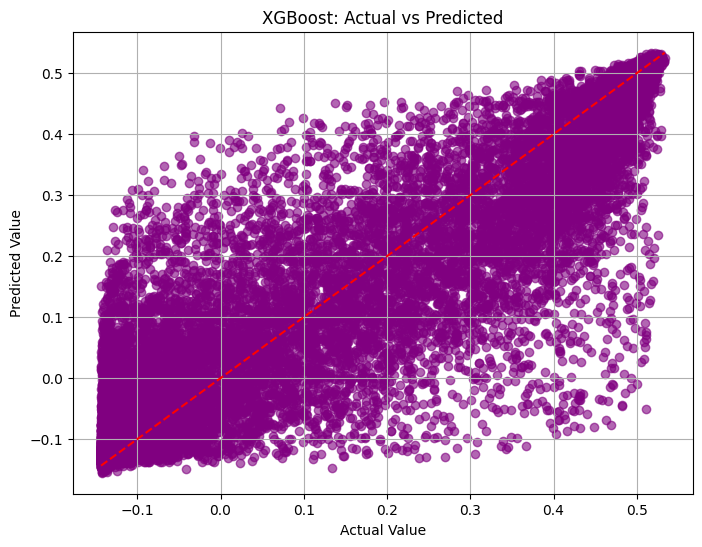

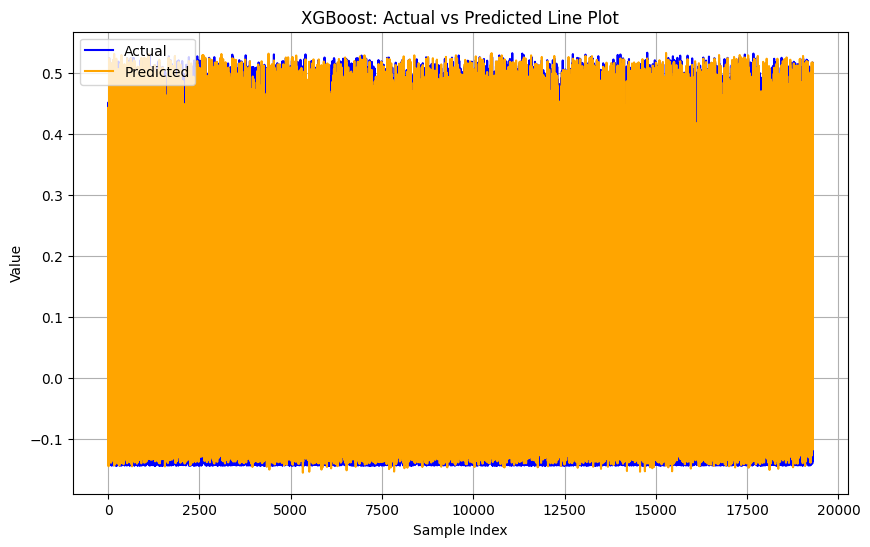

In [57]:
X = final_scaled_df[['Quantity_YJ', 'Country_YJ', 'Year_YJ']]
y = final_scaled_df['Value_YJ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("XGBoost Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")


# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.show()

# Line plot: Sample-wise Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('XGBoost: Actual vs Predicted Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Predict on training data
y_train_pred = xgb_model.predict(X_train)

# Evaluation on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation on testing data (already done)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")

print("\nTesting Performance:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Simple interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("\n→ The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("\n→ The model may be UNDERFITTING.")
else:
    print("\n→ The model seems to be GENERALIZING well.")


Training Performance:
Train MSE: 0.01
Train R-squared: 0.81

Testing Performance:
Test MSE: 0.01
Test R-squared: 0.80

→ The model seems to be GENERALIZING well.


Light GBM Regression

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 77181, number of used features: 3
[LightGBM] [Info] Start training from score 0.095291
LightGBM Regression Evaluation:
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
Mean Squared Log Error (MSLE): 0.0092
Mean Absolute Percentage Error (MAPE): 994592724413.84%
R-squared Score (R²): 0.79
Accuracy Percentage (based on R²): 79.24%


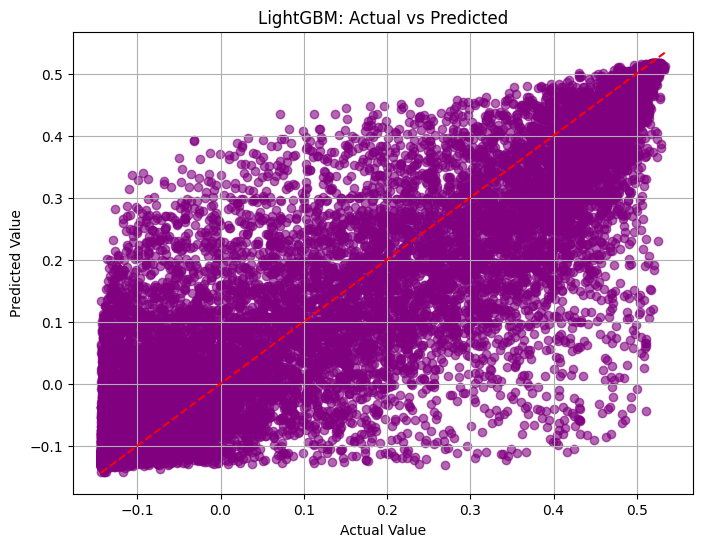

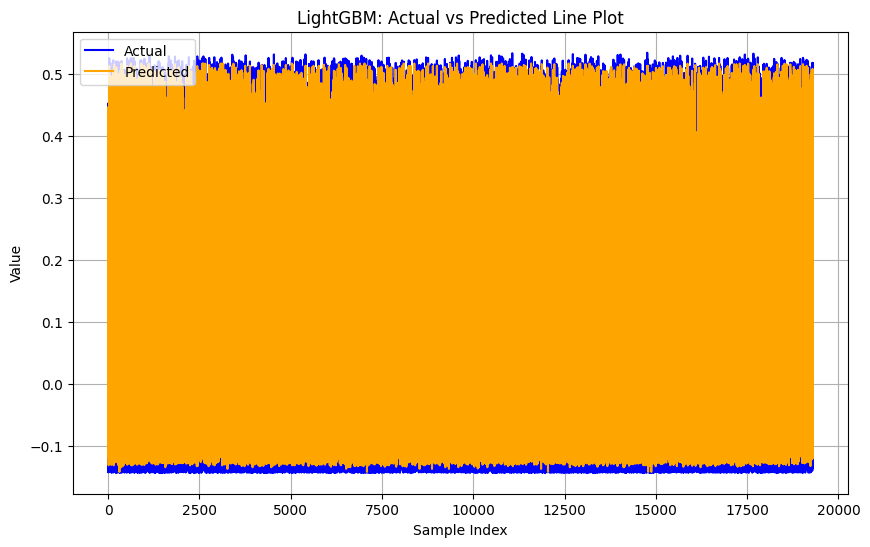

In [59]:
X = final_scaled_df[['Quantity_YJ', 'Country_YJ', 'Year_YJ']]
y = final_scaled_df['Value_YJ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    objective='regression',
    random_state=42
)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("LightGBM Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('LightGBM: Actual vs Predicted')
plt.grid(True)
plt.show()

# Line plot: Sample-wise Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('LightGBM: Actual vs Predicted Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
# Predict on training data
y_train_pred = lgb_model.predict(X_train)

# Evaluation on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation on testing data (already done)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")

print("\nTesting Performance:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Simple interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("\n→ The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("\n→ The model may be UNDERFITTING.")
else:
    print("\n→ The model seems to be GENERALIZING well.")


Training Performance:
Train MSE: 0.01
Train R-squared: 0.79

Testing Performance:
Test MSE: 0.01
Test R-squared: 0.79

→ The model seems to be GENERALIZING well.


# Repeating the same steps with Iron and Steel Dataset

In [61]:
ironsteel_df = final_df[final_df['Overview of items'] == 'IRON AND STEEL PRODUCTS']
ironsteel_df

,Year,HS Code,Country,Units,Quantity,Value,Domestic code,Overview of items
59199,2021,730110,103,KG,502020,47747,000,IRON AND STEEL PRODUCTS
59200,2021,730110,105,KG,33165769,2262644,000,IRON AND STEEL PRODUCTS
59201,2021,730110,106,KG,33230402,2802730,000,IRON AND STEEL PRODUCTS
59202,2021,730110,108,KG,15301435,1520447,000,IRON AND STEEL PRODUCTS
59203,2021,730110,110,KG,3046945,285267,000,IRON AND STEEL PRODUCTS
...,...,...,...,...,...,...,...,...
472160,2024,730799,602,KG,129,2090,990,IRON AND STEEL PRODUCTS
472161,2024,730799,606,KG,843,5823,990,IRON AND STEEL PRODUCTS
472162,2024,730799,619,KG,1,253,990,IRON AND STEEL PRODUCTS
472163,2024,730799,625,KG,191,4868,990,IRON AND STEEL PRODUCTS


In [62]:
ironsteel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5783 entries, 59199 to 472164
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               5783 non-null   int64 
 1   HS Code            5783 non-null   object
 2   Country            5783 non-null   int64 
 3   Units              5783 non-null   object
 4   Quantity           5783 non-null   int64 
 5   Value              5783 non-null   int64 
 6   Domestic code      5783 non-null   object
 7   Overview of items  5783 non-null   object
dtypes: int64(4), object(4)
memory usage: 406.6+ KB


In [63]:
# (Make sure these are indeed numeric. If some are categorical-coded, confirm they're in numeric form).

# Select the numeric columns to scale
numeric_cols = ironsteel_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize robustScaler
robust_scalar = RobustScaler()

# Fit and transform only the numeric columns
scaled_array = robust_scalar.fit_transform(ironsteel_df[numeric_cols])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=ironsteel_df.index)

# (Optional) If you want to merge back with non-numeric columns:
non_numeric_df = ironsteel_df.drop(columns=numeric_cols)
final_scaled_df = pd.concat([scaled_df, non_numeric_df], axis=1)

print("Sample of robust scaled data:")
print(final_scaled_df.head())

Sample of robust scaled data:
       Year   Country    Quantity      Value HS Code Units Domestic code  \
59199  -0.5 -0.518325    4.829421   0.360381  730110    KG           000   
59200  -0.5 -0.507853  321.676341  22.272915  730110    KG           000   
59201  -0.5 -0.502618  322.303298  27.616122  730110    KG           000   
59202  -0.5 -0.492147  148.387622  14.930173  730110    KG           000   
59203  -0.5 -0.481675   29.515860   2.710227  730110    KG           000   

             Overview of items  
59199  IRON AND STEEL PRODUCTS  
59200  IRON AND STEEL PRODUCTS  
59201  IRON AND STEEL PRODUCTS  
59202  IRON AND STEEL PRODUCTS  
59203  IRON AND STEEL PRODUCTS  


In [64]:
final_scaled_df['Value_log'] = np.log(final_scaled_df['Value'] + 1)

In [65]:
final_scaled_df['Value_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Value_log'])

In [66]:
final_scaled_df['Quantity_log'] = np.log(final_scaled_df['Quantity'] + 1)

In [67]:
final_scaled_df['Quantity_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Quantity_log'])

In [68]:
final_scaled_df['Year_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Year'])

In [69]:
final_scaled_df['Country_YJ'], fitted_lambda = yeojohnson(final_scaled_df['Country'])

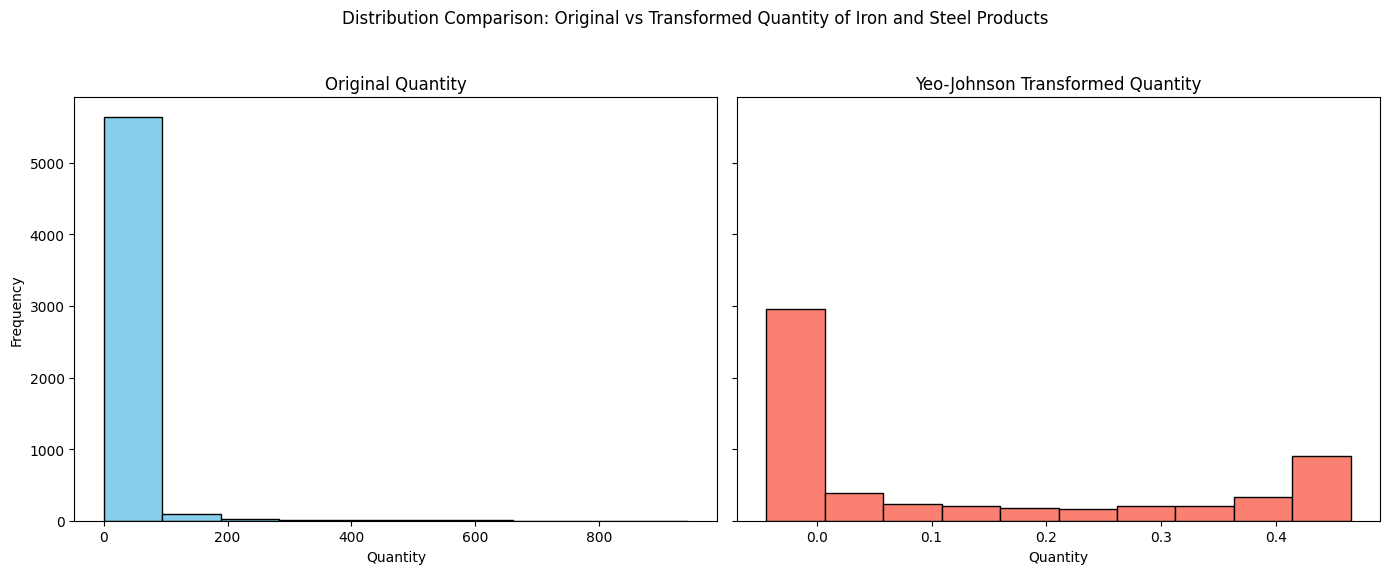

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Original Quantity
axs[0].hist(final_scaled_df['Quantity'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Original Quantity')
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Frequency')

# Right: Transformed Quantity (Yeo-Johnson)
axs[1].hist(final_scaled_df['Quantity_YJ'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Yeo-Johnson Transformed Quantity')
axs[1].set_xlabel('Quantity')

plt.suptitle('Distribution Comparison: Original vs Transformed Quantity of Iron and Steel Products')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

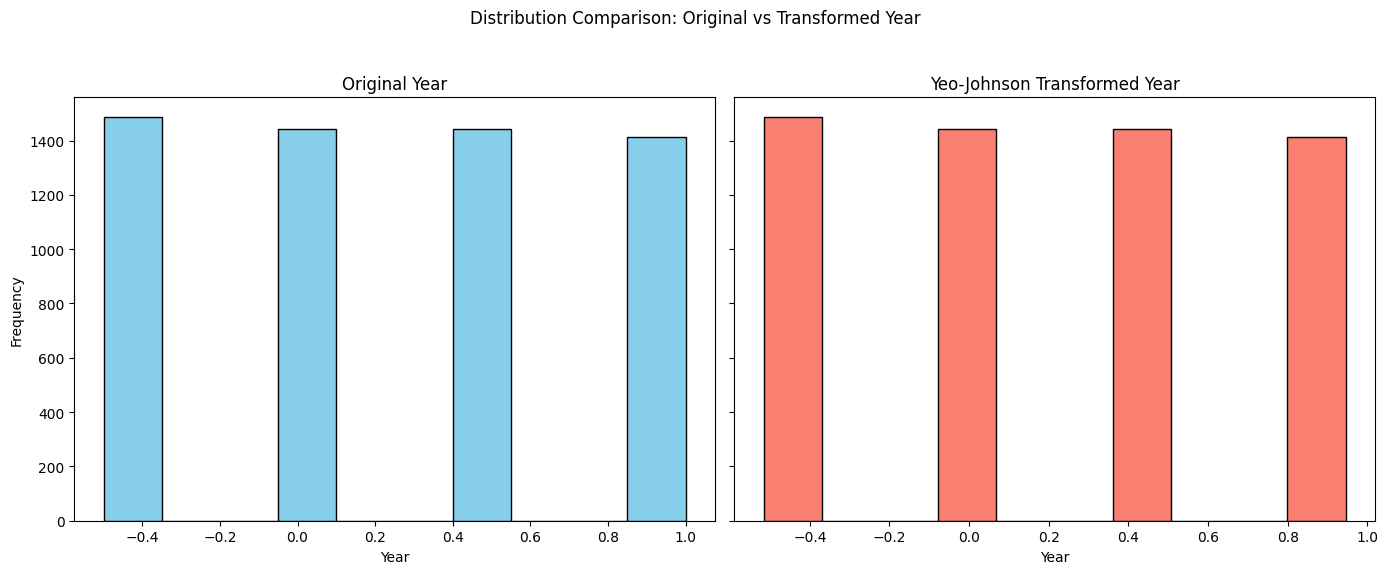

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Original Year
axs[0].hist(final_scaled_df['Year'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Original Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Frequency')

# Right: Transformed Year (Yeo-Johnson)
axs[1].hist(final_scaled_df['Year_YJ'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Yeo-Johnson Transformed Year')
axs[1].set_xlabel('Year')

plt.suptitle('Distribution Comparison: Original vs Transformed Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

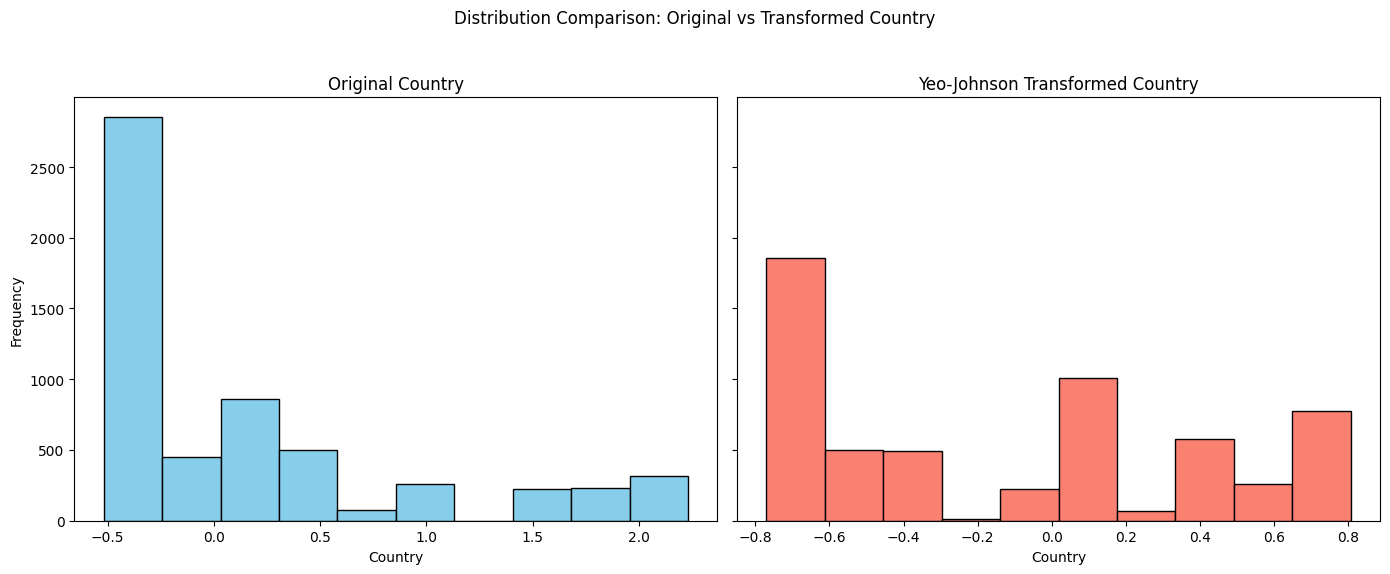

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Original Country
axs[0].hist(final_scaled_df['Country'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Original Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Frequency')

# Right: Transformed Country (Yeo-Johnson)
axs[1].hist(final_scaled_df['Country_YJ'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Yeo-Johnson Transformed Country')
axs[1].set_xlabel('Country')

plt.suptitle('Distribution Comparison: Original vs Transformed Country')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

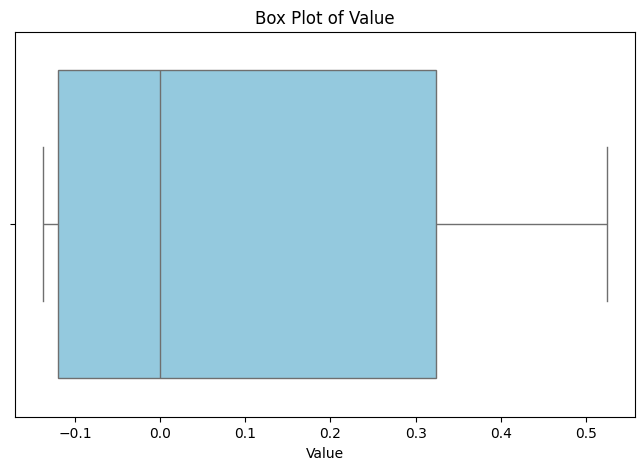

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Value_YJ'], color='skyblue')
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()

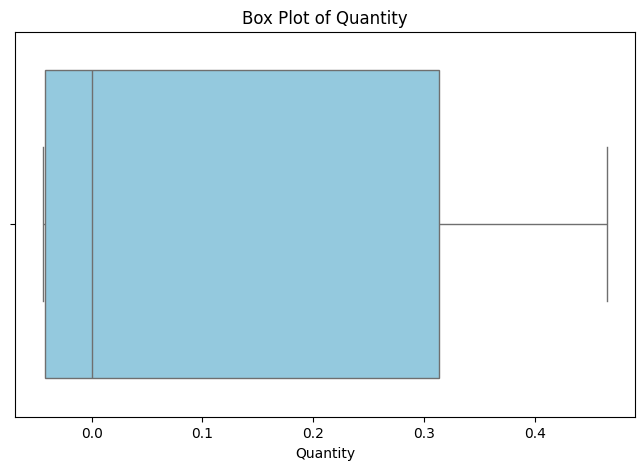

In [74]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Quantity_YJ'], color='skyblue')
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

In [75]:
Q1 = final_scaled_df['Quantity_YJ'].quantile(0.25)
Q3 = final_scaled_df['Quantity_YJ'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter out the outliers (or alternatively, cap them)
final_scaled_df = final_scaled_df[(final_scaled_df['Quantity_YJ'] >= lower_bound) & (final_scaled_df['Quantity_YJ'] <= upper_bound)]
print("Data after IQR filtering:\n", final_scaled_df)

Lower Bound: -0.5739656657784281
Upper Bound: 0.8454650645156894
Data after IQR filtering:
         Year   Country    Quantity      Value HS Code Units Domestic code  \
59199   -0.5 -0.518325    4.829421   0.360381  730110    KG           000   
59200   -0.5 -0.507853  321.676341  22.272915  730110    KG           000   
59201   -0.5 -0.502618  322.303298  27.616122  730110    KG           000   
59202   -0.5 -0.492147  148.387622  14.930173  730110    KG           000   
59203   -0.5 -0.481675   29.515860   2.710227  730110    KG           000   
...      ...       ...         ...        ...     ...   ...           ...   
472160   1.0  2.094241   -0.039053  -0.091315  730799    KG           990   
472161   1.0  2.115183   -0.032127  -0.054383  730799    KG           990   
472162   1.0  2.183246   -0.040295  -0.109489  730799    KG           990   
472163   1.0  2.214660   -0.038452  -0.063831  730799    KG           990   
472164   1.0  2.230366   -0.038229  -0.102563  730799    KG  

In [76]:
Q1 = final_scaled_df['Value_YJ'].quantile(0.25)
Q3 = final_scaled_df['Value_YJ'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter out the outliers (or alternatively, cap them)
final_scaled_df = final_scaled_df[(final_scaled_df['Value_YJ'] >= lower_bound) & (final_scaled_df['Value_YJ'] <= upper_bound)]
print("Data after IQR filtering:\n", final_scaled_df)

Lower Bound: -0.7851038937112097
Upper Bound: 0.9901402102595294
Data after IQR filtering:
         Year   Country    Quantity      Value HS Code Units Domestic code  \
59199   -0.5 -0.518325    4.829421   0.360381  730110    KG           000   
59200   -0.5 -0.507853  321.676341  22.272915  730110    KG           000   
59201   -0.5 -0.502618  322.303298  27.616122  730110    KG           000   
59202   -0.5 -0.492147  148.387622  14.930173  730110    KG           000   
59203   -0.5 -0.481675   29.515860   2.710227  730110    KG           000   
...      ...       ...         ...        ...     ...   ...           ...   
472160   1.0  2.094241   -0.039053  -0.091315  730799    KG           990   
472161   1.0  2.115183   -0.032127  -0.054383  730799    KG           990   
472162   1.0  2.183246   -0.040295  -0.109489  730799    KG           990   
472163   1.0  2.214660   -0.038452  -0.063831  730799    KG           990   
472164   1.0  2.230366   -0.038229  -0.102563  730799    KG  

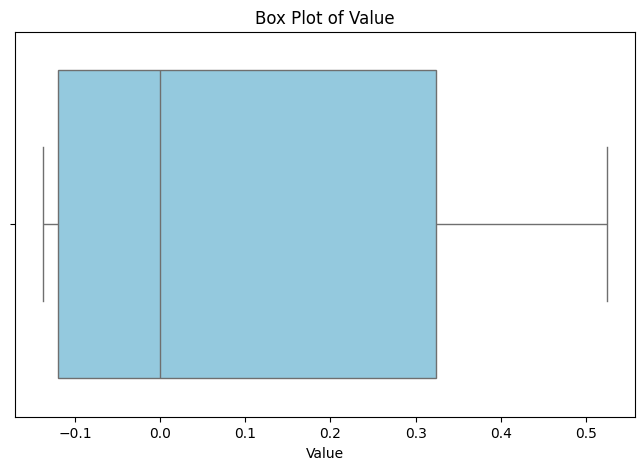

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Value_YJ'], color='skyblue')
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()

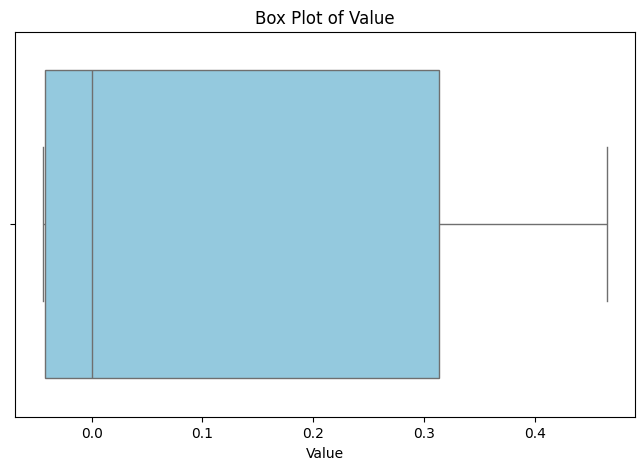

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_scaled_df['Quantity_YJ'], color='skyblue')
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()

Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
Mean Squared Log Error (MSLE): 0.0079
Mean Absolute Percentage Error (MAPE): 81.42%
R-squared Score (R²): 0.82
Accuracy Percentage (based on R²): 81.75%
Accuracy of the model: 81.75%


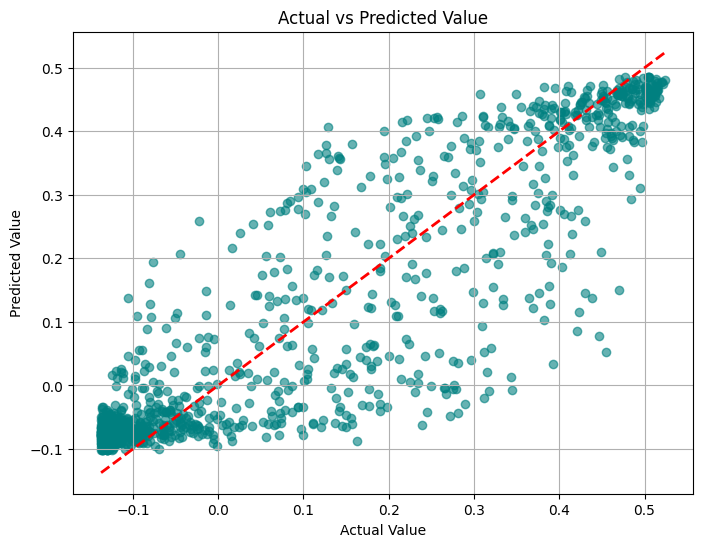

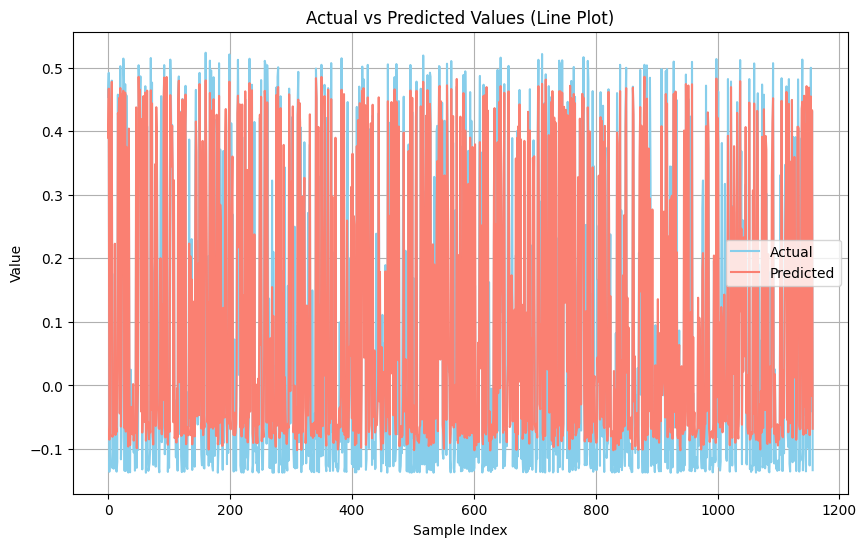

In [79]:
# Step 1: Define features (X) and target (y)
X = final_scaled_df[['Quantity_YJ', 'Year_YJ', 'Country_YJ']]
y = final_scaled_df['Value_YJ']

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")

accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model: {accuracy:.2f}%")

# 1. Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value')
plt.grid(True)
plt.show()

# 2. Line plot (index-based comparison)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='skyblue')
plt.plot(y_pred, label='Predicted', color='salmon')
plt.title('Actual vs Predicted Values (Line Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Evaluation on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation on testing data (already done)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")

print("\nTesting Performance:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Simple interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("\n→ The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("\n→ The model may be UNDERFITTING.")
else:
    print("\n→ The model seems to be GENERALIZING well.")


Training Performance:
Train MSE: 0.02
Train R-squared: 0.65

Testing Performance:
Test MSE: 0.01
Test R-squared: 0.82

→ The model seems to be GENERALIZING well.


RandomForest Regression Evaluation:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09
Mean Squared Log Error (MSLE): 0.0070
Mean Absolute Percentage Error (MAPE): 89.54%
R-squared Score (R²): 0.84
Accuracy Percentage (based on R²): 83.85%


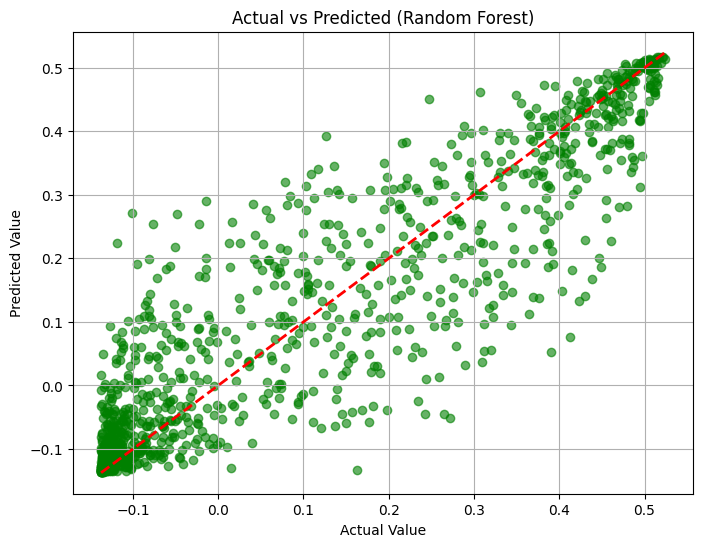

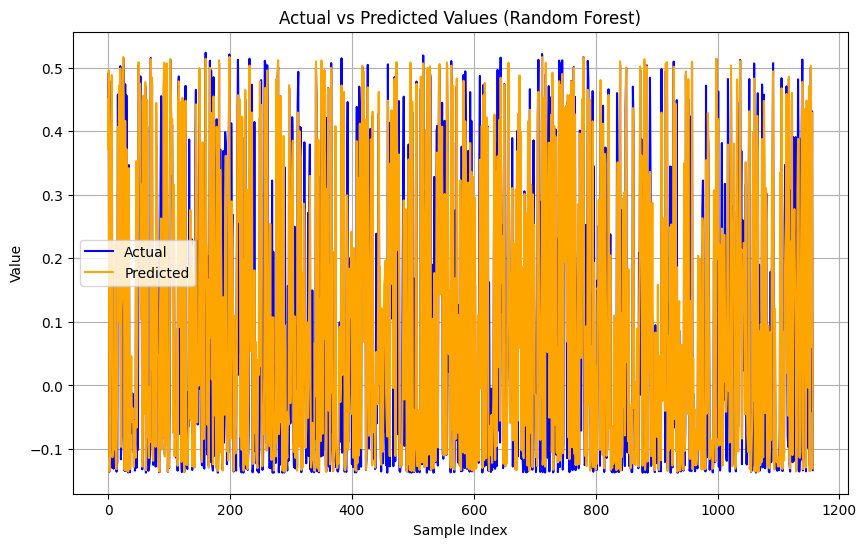

In [81]:
# Step 1: Define features and target
X = final_scaled_df[['Quantity_YJ', 'Year_YJ', 'Country_YJ']]
y = final_scaled_df['Value_YJ']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("RandomForest Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")

# Step 6: Plots

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted (Random Forest)')
plt.grid(True)
plt.show()

# Line plot: Sample-wise Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Evaluation on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation on testing data (already done)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")

print("\nTesting Performance:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Simple interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("\n→ The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("\n→ The model may be UNDERFITTING.")
else:
    print("\n→ The model seems to be GENERALIZING well.")


Training Performance:
Train MSE: 0.00
Train R-squared: 0.98

Testing Performance:
Test MSE: 0.01
Test R-squared: 0.84

→ The model seems to be GENERALIZING well.


XGBoost Regression Evaluation:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09
Mean Squared Log Error (MSLE): 0.0070
Mean Absolute Percentage Error (MAPE): 89.54%
R-squared Score (R²): 0.84
Accuracy Percentage (based on R²): 83.85%


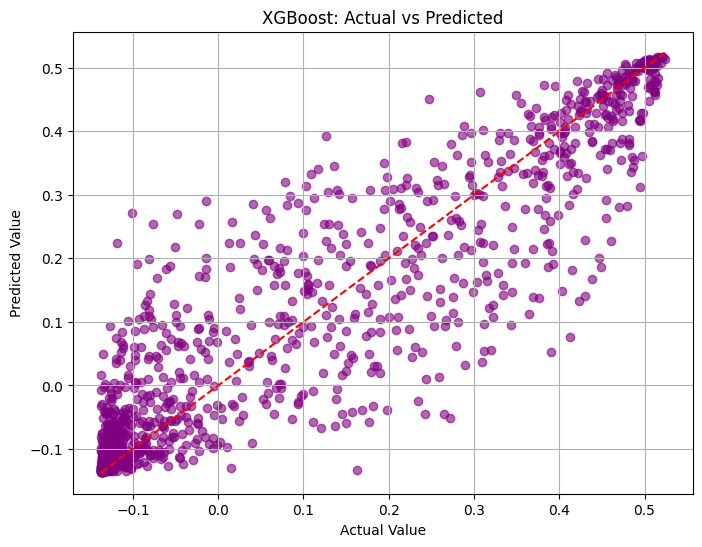

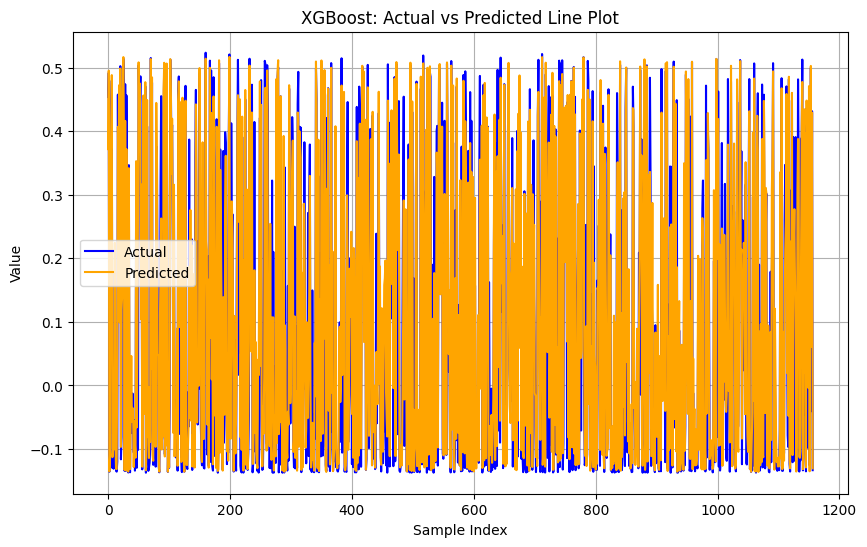

In [83]:
X = final_scaled_df[['Quantity_YJ', 'Country_YJ', 'Year_YJ']]
y = final_scaled_df['Value_YJ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("XGBoost Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.show()

# Line plot: Sample-wise Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('XGBoost: Actual vs Predicted Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# Evaluate on training data
y_train_pred = xgb_model.predict(X_train)

# Training performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing performance (already available)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\nModel Overfitting/Generalization Check")
print("---------------------------------------")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing R²: {test_r2:.2f}")

# Heuristic interpretation
if train_r2 > 0.9 and test_r2 < 0.7:
    print("Conclusion: The model is likely OVERFITTING.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("Conclusion: The model may be UNDERFITTING.")
elif abs(train_r2 - test_r2) < 0.1:
    print("Conclusion: The model is GENERALIZING well.")
else:
    print("Conclusion: The model has room for improvement — try hyperparameter tuning or feature engineering.")



Model Overfitting/Generalization Check
---------------------------------------
Training MSE: 0.00
Testing MSE: 0.01
Training R²: 0.91
Testing R²: 0.84
Conclusion: The model is GENERALIZING well.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 4626, number of used features: 3
[LightGBM] [Info] Start training from score 0.098478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

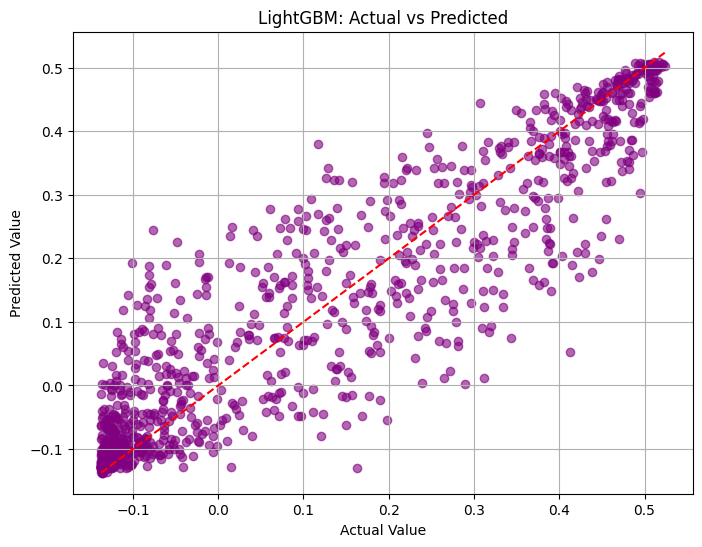

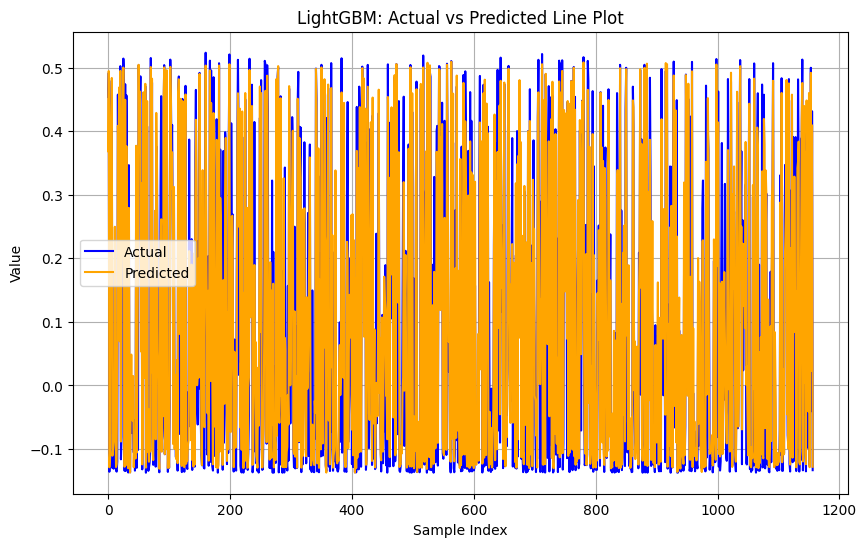

In [85]:
X = final_scaled_df[['Quantity_YJ', 'Country_YJ', 'Year_YJ']]
y = final_scaled_df['Value_YJ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    objective='regression',
    random_state=42
)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print Evaluation Results
print("LightGBM Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared Score (R²): {r2:.2f}")
print(f"Accuracy Percentage (based on R²): {accuracy:.2f}%")


# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('LightGBM: Actual vs Predicted')
plt.grid(True)
plt.show()

# Line plot: Sample-wise Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('LightGBM: Actual vs Predicted Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
# Predict on training data
y_train_pred = lgb_model.predict(X_train)

# Metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Metrics for testing data (already computed, reuse if available)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("\nModel Overfitting/Generalization Check")
print("---------------------------------------")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing R²: {test_r2:.2f}")

# Simple analysis
if train_r2 > 0.9 and test_r2 < 0.7:
    print("Conclusion: The model is likely OVERFITTING the training data.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("Conclusion: The model may be UNDERFITTING — try increasing model complexity or features.")
elif abs(train_r2 - test_r2) < 0.1:
    print("Conclusion: The model is GENERALIZING well.")
else:
    print("Conclusion: Some imbalance exists; tune hyperparameters or use more data.")



Model Overfitting/Generalization Check
---------------------------------------
Training MSE: 0.01
Testing MSE: 0.01
Training R²: 0.88
Testing R²: 0.86
Conclusion: The model is GENERALIZING well.
